In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Inspired by https://www.kaggle.com/code/mahmoudlimam/resampling-tutorial
# Importance measurement - f1 score (recall & precision)

y_col = "HeartDiseaseOrAttack"
colsToDrop = ["State"]

In [4]:
df = pd.read_csv('../data/heart_disease_health_indicators_BRFSS2021.csv')

for col in colsToDrop:
    df = df.drop(col, axis=1)

<AxesSubplot: xlabel='HeartDiseaseOrAttack', ylabel='count'>

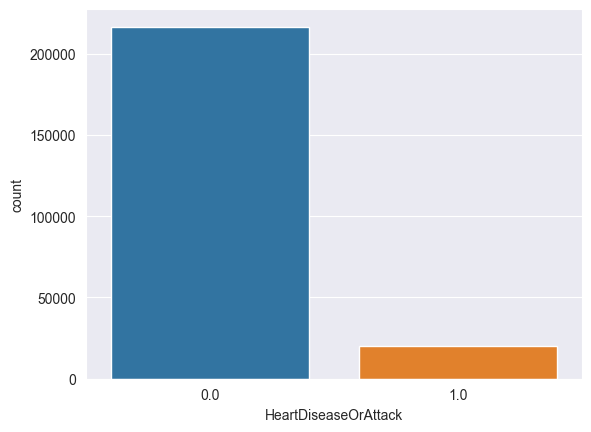

In [5]:
sns.countplot(data=df, x=y_col)

In [6]:
X = df.drop(y_col, axis=1)
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [7]:
def train_evaluate(X_train, X_test, y_train, y_test, sampler=None, model=None, depth=12, basic=False):

    if model is None:
        if basic:
            model = RandomForestClassifier(n_jobs=-1, max_depth=6, verbose=1, random_state=9)
        else:
            model = RandomForestClassifier(n_jobs=-1, max_depth=depth, class_weight="balanced_subsample", verbose=1, random_state=9)
        #model = RandomForestClassifier(n_jobs=-1, max_depth=6, verbose=1, random_state=7)

    Xs_train, ys_train = X_train, y_train

    if sampler is not None:
        Xs_train, ys_train = sampler.fit_resample(X_train, y_train)

    model.fit(Xs_train, ys_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Training Results:\n")
    print(classification_report(y_train, y_pred_train))
    print("\n\nTesting Results:\n")
    print(classification_report(y_test, y_pred_test))

In [8]:
# Without re-sampling
train_evaluate(X_train, X_test, y_train, y_test, depth=6, basic=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96    173132
         1.0       0.73      0.01      0.01     16314

    accuracy                           0.91    189446
   macro avg       0.82      0.50      0.48    189446
weighted avg       0.90      0.91      0.87    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     43425
         1.0       0.78      0.01      0.01      3937

    accuracy                           0.92     47362
   macro avg       0.85      0.50      0.48     47362
weighted avg       0.91      0.92      0.88     47362



In [9]:
# With balanced subsample class_weight
train_evaluate(X_train, X_test, y_train, y_test, depth=6)

# With no re-sampling we get for test (max depth 6, default):
# Recall for 1.0: 0.01 --> 0.83
# Macro-Average F1: 0.48 --> 0.59


# 1 = 0.75, 0.58
# 2 = 0.78, 0.59
# 3 = 0.74, 0.59
# 6 = 0.83, 0.59 # High recall, low precision
# 10 = 0.8, 0.61
# 15 = 0.58, 0.65
# 20 = 0.31, 0.63
# 25 = 0.14, 0.58
# 50 = 0.06, 0.53

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    173132
         1.0       0.22      0.83      0.35     16314

    accuracy                           0.73    189446
   macro avg       0.60      0.78      0.59    189446
weighted avg       0.91      0.73      0.79    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     43425
         1.0       0.21      0.83      0.34      3937

    accuracy                           0.73     47362
   macro avg       0.60      0.78      0.59     47362
weighted avg       0.92      0.73      0.79     47362



In [10]:
## -- Undersampling --

#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler)

# Test Results:
# Recall for 1.0: 0.01 -> 0.83 --> 0.83
# Macro-Average F1: 0.48 -> 0.58 --> 0.59

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.99      0.74      0.84    173132
         1.0       0.24      0.90      0.38     16314

    accuracy                           0.75    189446
   macro avg       0.61      0.82      0.61    189446
weighted avg       0.92      0.75      0.80    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     43425
         1.0       0.22      0.83      0.34      3937

    accuracy                           0.74     47362
   macro avg       0.60      0.78      0.59     47362
weighted avg       0.92      0.74      0.79     47362



In [11]:
import faiss

#https://towardsdatascience.com/k-means-8x-faster-27x-lower-error-than-scikit-learns-in-25-lines-eaedc7a3a0c8
# class FaissKMeans:
#     def __init__(self, n_clusters=8, n_init=10, max_iter=300):
#         self.n_clusters = n_clusters
#         self.n_init = n_init
#         self.max_iter = max_iter
#         self.kmeans = None
#         self.cluster_centers_ = None
#         self.inertia_ = None
#
#     def fit(self, X, y=None):
#         self.kmeans = faiss.Kmeans(d=X.shape[1],
#                                    k=self.n_clusters,
#                                    niter=self.max_iter,
#                                    nredo=self.n_init)
#         self.kmeans.train(X.astype(np.float32))
#         self.cluster_centers_ = self.kmeans.centroids
#         self.inertia_ = self.kmeans.obj[-1]
#
#     def predict(self, X):
#         return self.kmeans.index.search(X.astype(np.float32), 1)[1]
#
#     def get_params(self, deep=True):
#         out = dict()
#         out["n_clusters"] = self.n_clusters
#         out["n_init"] = self.n_init
#         out["max_iter"] = self.max_iter
#         return out
#
#     def set_params(self, **params):
#         for key, value in params.items():
#             setattr(self, key, value)
#         return self

In [12]:
# Cluster Centroid Undersampling
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

skipKMeans = True

if not skipKMeans:
    kmeans = MiniBatchKMeans(verbose=1, batch_size=4096)
    sampler = ClusterCentroids(estimator=kmeans)

    # Time consuming
    train_evaluate(X_train, X_test, y_train, y_test, sampler)

    # Test Results:
    # Recall for 1.0: 0.01 -> 0.98
    # Macro-Average F1: 0.48 -> 0.33

C:\VSCode\Uni\COM618-DataScience\Practice\01-ReadDataSet\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Init 1/3 with method k-means++
Inertia for init 1/3: 331535.9225749999
Init 2/3 with method k-means++
Inertia for init 2/3: 333136.7548999997
Init 3/3 with method k-means++
Inertia for init 3/3: 334069.0760499998
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 1/4226: mean batch inertia: 6.561894854736329
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 2/4226: mean batch inertia: 7.273075881266277, ewa inertia: 7.273075881266277
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 3/4226: mean batch inertia: 7.245167257879279, ewa inertia: 7.271755350559904
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 4/4226: mean batch inertia: 7.283605307125247, ewa inertia: 7.272316045772159
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 5/4226: mean batch inertia: 7.296393980422934, ewa inertia: 7.2734553227480045
[MiniBatchKMeans] Reassigning 2048 cluster centers.
Minibatch step 6/4226: mean batch inertia

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       1.00      0.18      0.31    173132
         1.0       0.10      1.00      0.19     16314

    accuracy                           0.25    189446
   macro avg       0.55      0.59      0.25    189446
weighted avg       0.92      0.25      0.30    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       1.00      0.18      0.31     43425
         1.0       0.10      0.99      0.18      3937

    accuracy                           0.25     47362
   macro avg       0.55      0.59      0.24     47362
weighted avg       0.92      0.25      0.30     47362



In [13]:
## Oversampling

# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler, basic=True)
# Test Results:
# Recall for 1.0: 0.01 -> 0.83
# Macro-Average F1: 0.48 -> 0.59

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83    173132
         1.0       0.22      0.83      0.35     16314

    accuracy                           0.73    189446
   macro avg       0.60      0.78      0.59    189446
weighted avg       0.91      0.73      0.79    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     43425
         1.0       0.21      0.83      0.34      3937

    accuracy                           0.73     47362
   macro avg       0.60      0.78      0.59     47362
weighted avg       0.92      0.73      0.79     47362



In [14]:
#SMOTE Oversampling
from imblearn.over_sampling import SMOTE

sampler = SMOTE(k_neighbors=5, random_state=11)
train_evaluate(X_train, X_test, y_train, y_test, sampler, basic=True)
# Test Results:
# Recall for 1.0: 0.01 -> 0.61 - 0.35 - 0.40
# Macro-Average F1: 0.48 -> 0.64 -> 0.65 - 0.66

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90    173132
         1.0       0.28      0.60      0.38     16314

    accuracy                           0.83    189446
   macro avg       0.62      0.73      0.64    189446
weighted avg       0.90      0.83      0.86    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90     43425
         1.0       0.27      0.60      0.38      3937

    accuracy                           0.83     47362
   macro avg       0.62      0.73      0.64     47362
weighted avg       0.90      0.83      0.86     47362



In [15]:
# Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
sampler = BorderlineSMOTE(k_neighbors=5, random_state=11)

train_evaluate(X_train, X_test, y_train, y_test, sampler, basic=True)
# Test Results:
# Recall for 1.0: 0.01 -> 0.59
# Macro-Average F1: 0.48 -> 0.64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90    173132
         1.0       0.28      0.60      0.38     16314

    accuracy                           0.84    189446
   macro avg       0.62      0.73      0.64    189446
weighted avg       0.90      0.84      0.86    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     43425
         1.0       0.28      0.59      0.38      3937

    accuracy                           0.84     47362
   macro avg       0.62      0.73      0.64     47362
weighted avg       0.90      0.84      0.86     47362



In [16]:
from smote_variants import DBSMOTE
oversampler = DBSMOTE(min_samples=10)

train_evaluate(X_train, X_test, y_train, y_test, sampler, basic=True)
# Test Results:
# Recall for 1.0: 0.01 -> 0.6
# Macro-Average F1: 0.48 -> 0.64

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90    173132
         1.0       0.28      0.60      0.38     16314

    accuracy                           0.84    189446
   macro avg       0.62      0.73      0.64    189446
weighted avg       0.90      0.84      0.86    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     43425
         1.0       0.28      0.59      0.38      3937

    accuracy                           0.84     47362
   macro avg       0.62      0.73      0.64     47362
weighted avg       0.90      0.84      0.86     47362



In [17]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scal = scaler.fit_transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, columns=X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, columns=X_test.columns)

#df_scaled = scaler.fit_transform(df.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#X_scal = df.drop(y_col, axis=1)
#y_scal = df[y_col]

#X_scal_train, X_scal_test, y_scal_train, y_scal_test = train_test_split(X_scal, y_scal, test_size=0.1, random_state=45)

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier
model2 = HistGradientBoostingClassifier(class_weight='balanced')

train_evaluate(X_train_scal, X_test_scal, y_train, y_test, model=model2)
# With Scaling
# 0.83, 0.60

Training Results:

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85    173132
         1.0       0.24      0.84      0.37     16314

    accuracy                           0.75    189446
   macro avg       0.61      0.79      0.61    189446
weighted avg       0.92      0.75      0.81    189446



Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      0.74      0.85     43425
         1.0       0.23      0.82      0.35      3937

    accuracy                           0.75     47362
   macro avg       0.60      0.78      0.60     47362
weighted avg       0.92      0.75      0.80     47362



In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

X_clean = X.drop("DiabetesAge", axis=1)

toDrop = ["DiabetesAge"]

X_cat = X.drop(toDrop, axis=1)
X_cat["BMI"] =  pd.cut(X_cat["BMI"], [0,20,40,60,80,100], labels=[0, 1, 2, 3, 4] ,include_lowest=True)
X_cat["FruitsPerDay"] = pd.cut(X_cat["FruitsPerDay"], [0,0.5,1,2,4,8], labels=[0, 1, 2, 3, 4] ,include_lowest=True)
X_cat["DarkGreensPerDay"] = pd.cut(X_cat["DarkGreensPerDay"], [0,0.5,1,2,4, 8], labels=[0, 1, 2, 3, 4] ,include_lowest=True)
X_cat["PotatoesPerDay"] = pd.cut(X_cat["PotatoesPerDay"], [0, 0.25, 0.5,1,2,4, 8], labels=[0, 1, 2, 3, 4, 5] ,include_lowest=True)
X_cat["OtherVegPerDay"] = pd.cut(X_cat["OtherVegPerDay"], [0, 0.25, 0.5,1,2,4, 8], labels=[0, 1, 2, 3, 4, 5] ,include_lowest=True)
X_cat["BadMentalHealthLast30Days"] = pd.cut(X_cat["BadMentalHealthLast30Days"], [0, 5, 10, 15, 20, 25, 30], labels=[0, 1, 2, 3, 4, 5] ,include_lowest=True)
X_cat["BadPhysicalHealthLast30Days"] = pd.cut(X_cat["BadPhysicalHealthLast30Days"], [0, 5, 10, 15, 20, 25, 30], labels=[0, 1, 2, 3, 4, 5] ,include_lowest=True)

In [20]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.2, random_state=109)

In [21]:
np.any(np.isnan(y_test_cat.values))

False

In [22]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn import metrics

def evalBayes(model, sampler=None):

    new_X_train_cat, new_X_test_cat, new_y_train_cat, new_y_test_cat = train_test_split(X_cat, y, test_size=0.2, random_state=109)

    X_train_toUse = new_X_train_cat
    y_train_toUse = new_y_train_cat

    if(sampler is not None):
        X_train_toUse, y_train_toUse = sampler.fit_resample(new_X_train_cat, new_y_train_cat)

    model.fit(X_train_toUse, y_train_toUse)

    new_y_pred_cat = model.predict(new_X_test_cat)

    print("Accuracy: ", metrics.accuracy_score(new_y_test_cat, new_y_pred_cat))

    print(classification_report(new_y_test_cat, new_y_pred_cat))

    return model, new_y_test_cat, new_y_pred_cat

In [23]:
X_cat.head()

,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,Diabetes,PhysActivityLast30Days,FruitsPerDay,DarkGreensPerDay,...,GeneralHealth,BadMentalHealthLast30Days,BadPhysicalHealthLast30Days,DiffWalking,Sex,AgeGroup,HighestEducation,IncomeGroup,HighBPMeds,CholMeds
0,0.000,1.000,1.000,0,1.000,0.000,0.000,0.000,1,1,...,5.000,1,3,0.000,0.000,11.000,4.000,5.000,0.000,1.000
1,1.000,1.000,1.000,1,0.000,0.000,2.000,1.000,0,0,...,2.000,1,0,0.000,0.000,9.000,4.000,7.000,1.000,0.000
2,0.000,1.000,1.000,1,0.000,1.000,2.000,1.000,1,1,...,5.000,0,5,1.000,1.000,12.000,3.000,4.000,0.000,1.000
3,0.000,0.000,1.000,1,1.000,0.000,0.000,0.000,0,0,...,3.000,0,0,1.000,1.000,13.000,5.000,6.000,0.000,0.000
4,1.000,0.000,1.000,1,1.000,0.000,0.000,1.000,1,0,...,3.000,0,4,1.000,0.000,10.000,4.000,8.000,1.000,1.000


In [24]:
to_predict = [0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 4, 0, 0, 0, 1, 0, 4, 5, 0, 0]

In [72]:
gnb = GaussianNB()

evalBayes(gnb)

Accuracy:  0.8091296820235632
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     65137
         1.0       0.25      0.62      0.35      5906

    accuracy                           0.81     71043
   macro avg       0.60      0.72      0.62     71043
weighted avg       0.90      0.81      0.84     71043



(GaussianNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [73]:
evalBayes(MultinomialNB())

Accuracy:  0.8578466562504399
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     65137
         1.0       0.26      0.40      0.32      5906

    accuracy                           0.86     71043
   macro avg       0.60      0.65      0.62     71043
weighted avg       0.89      0.86      0.87     71043



(MultinomialNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [74]:
evalBayes(MultinomialNB())

Accuracy:  0.8578466562504399
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     65137
         1.0       0.26      0.40      0.32      5906

    accuracy                           0.86     71043
   macro avg       0.60      0.65      0.62     71043
weighted avg       0.89      0.86      0.87     71043



(MultinomialNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [75]:
evalBayes(ComplementNB())

Accuracy:  0.7499542530580071
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.85     65137
         1.0       0.21      0.70      0.32      5906

    accuracy                           0.75     71043
   macro avg       0.59      0.73      0.58     71043
weighted avg       0.90      0.75      0.80     71043



(ComplementNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 1., ..., 0., 0., 0.]))

In [76]:
evalBayes(BernoulliNB())

Accuracy:  0.851076108835494
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92     65137
         1.0       0.28      0.49      0.36      5906

    accuracy                           0.85     71043
   macro avg       0.61      0.69      0.64     71043
weighted avg       0.89      0.85      0.87     71043



(BernoulliNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [77]:
evalBayes(CategoricalNB())

Accuracy:  0.8387314724884929
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     65137
         1.0       0.28      0.58      0.37      5906

    accuracy                           0.84     71043
   macro avg       0.62      0.72      0.64     71043
weighted avg       0.90      0.84      0.86     71043



(CategoricalNB(),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 140673   0.000
 200787   0.000
 79426    0.000
 232733   0.000
 29106    0.000
 Name: HeartDiseaseOrAttack, Length: 71043, dtype: float64,
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sampler = BorderlineSMOTE(random_state=11)

hgbc = HistGradientBoostingClassifier()

m, test, pred = evalBayes(hgbc, sampler)

Accuracy:  0.9149318018664753
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     43343
         1.0       0.50      0.13      0.21      4019

    accuracy                           0.91     47362
   macro avg       0.71      0.56      0.58     47362
weighted avg       0.89      0.91      0.89     47362



In [27]:
to_predict_result = m.predict([to_predict])
print("Heart disease prediction:" , to_predict_result[0])

Heart disease prediction: 0.0


C:\VSCode\Uni\COM618-DataScience\Practice\01-ReadDataSet\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


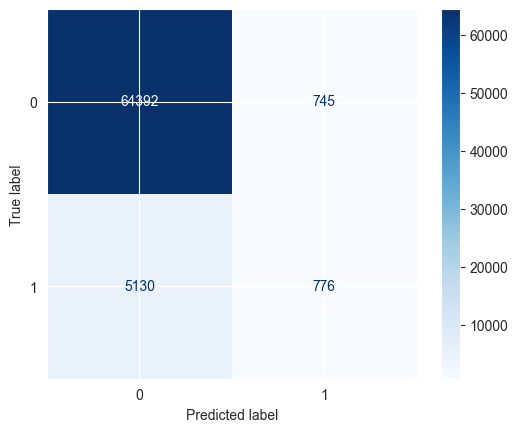

In [79]:
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [146]:
rfc = RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample")

evalBayes(rfc)

Accuracy:  0.9111946286052109
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     43343
         1.0       0.40      0.09      0.14      4019

    accuracy                           0.91     47362
   macro avg       0.66      0.54      0.55     47362
weighted avg       0.88      0.91      0.88     47362



(RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1),
 101637   0.000
 118159   1.000
 111167   0.000
 164341   0.000
 169897   0.000
           ... 
 90860    0.000
 63804    0.000
 150785   0.000
 200909   0.000
 121130   0.000
 Name: HeartDiseaseOrAttack, Length: 47362, dtype: float64,
 array([0., 1., 0., ..., 0., 0., 0.]))

HighBP = 0.03840828236331124
HighChol = 0.029855061265159324
CholCheckLast5Years = 0.0032275233964878013
BMI = 0.015595871247816235
Smoker = 0.02252685066393977
Stroke = 0.019288958160080073
Diabetes = 0.028388374877905215
PhysActivityLast30Days = 0.020930685932535917
FruitsPerDay = 0.05469526694708619
DarkGreensPerDay = 0.034480745711341514
PotatoesPerDay = 0.039361104512134655
OtherVegPerDay = 0.056075557925900715
HeavyDrinker = 0.008996957326795101
AnyHealthcare = 0.004285821390933245
CantAffordHealthcare = 0.008539711213408184
GeneralHealth = 0.07808552831222372
BadMentalHealthLast30Days = 0.02699490332964225
BadPhysicalHealthLast30Days = 0.02968311631835155
DiffWalking = 0.027971449524484323
Sex = 0.02532881973957854
AgeGroup = 0.13915750598612062
HighestEducation = 0.0516521356600778
IncomeGroup = 0.09781576334322904
HighBPMeds = 0.04856566890985538
CholMeds = 0.09008833594160161


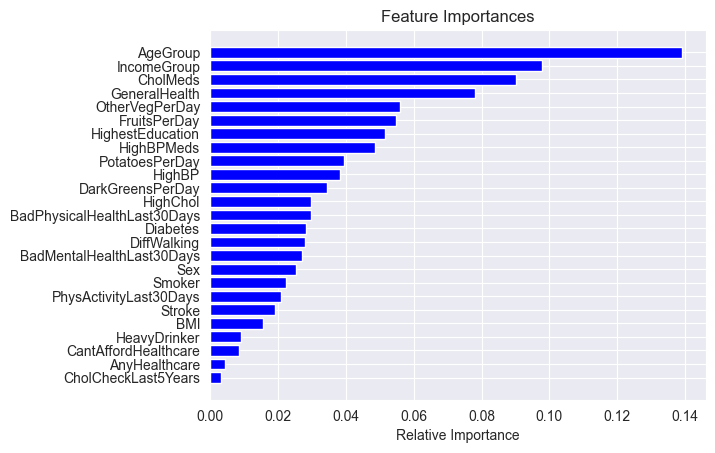

In [147]:
for name, importance in zip(X_cat.columns, rfc.feature_importances_):
    print(name, "=", importance)


features = X_cat.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()